# Let's take a look of Seattle AirBnB Open Data using Python

By analyzing AirBnB Seattle Open Data, We can provide valuable informations to hosts and customer.

### 1. How do seasonal costs change?
Provide seasonal costs to customer. It can be used as a reference when planning a trip

### 2. Which features are most related to homestay cost?
Correlation analysis allows hosts to see which factors have a significant impact on price. As a result of the analysis, the factors that have the greatest influence on price were in the order of number of accommodates, number of bedrooms, number of beds, number of bathrooms, and number of guests included. So, when the host decides the price, it's easier to find the right price through these five factors than other factors.

### 3. What is different between superhost and regular host?
AirBnB Superhost have more benefits than regular host. If we know what is different between superhost and regular host, It is much easier to become superhost. By the analysis, Big differences between superhost and regular host in seattle are location and number of reviews. Unexpectedly, average review scores are very similar.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns    
import gmplot
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
calendar = pd.read_csv("calendar.csv")
listings = pd.read_csv("listings.csv")
reviews = pd.read_csv("reviews.csv")

## Data Understanding - Let's see the data!

### Calendar.csv
- 1,393,570 rows
- Price is String of Decimal, with US Dollar symbol($)
- On days when accommodation is unavailable(available=f), the price is NaN
- No duplicated values

In [4]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
calendar.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [6]:
# proportion of NaN
pd.DataFrame(calendar.isna().sum() / len(calendar)).T

,listing_id,date,available,price
0,0.0,0.0,0.0,0.32939


In [7]:
# number of duplicates
calendar.duplicated().sum()

0

### Listings.csv
- 3818 rows, 92 columns
- No duplicated
- considerable counts of NaN

In [8]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [9]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [10]:
# check the null data
pd.DataFrame(listings.isna().sum() / len(listings)).T

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,0.0,0.0,0.0,0.0,0.0,0.046359,0.149031,0.0,0.0,0.270299,0.420639,0.244631,0.083814,0.083814,0.0,0.083814,0.0,0.0,0.000524,0.000524,0.002095,0.224987,0.136983,0.136983,0.202462,0.000524,0.000524,0.000524,0.078575,0.000524,0.000524,0.0,0.000524,0.000524,0.0,0.108958,0.0,0.0,0.0,0.0,0.001833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000262,0.0,0.0,0.004191,0.001572,0.000262,0.0,0.0,0.974594,0.0,0.473808,0.602672,0.511262,0.269775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.164222,0.164222,0.16946,0.172342,0.171032,0.172342,0.170508,0.171556,0.171818,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.164222


In [11]:
# number of duplicated
listings.duplicated().sum()

0

### Reviews.csv
- 84849 rows, 6 columns
- NaN in comments(Only rating, no comment)
- No duplicates

In [12]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [13]:
reviews.describe()

,listing_id,id,reviewer_id
count,8.484900e+04,8.484900e+04,8.484900e+04
mean,3.005067e+06,3.058765e+07,1.701301e+07
std,2.472877e+06,1.636613e+07,1.353704e+07
min,4.291000e+03,3.721000e+03,1.500000e+01
25%,7.946330e+05,1.725127e+07,5.053141e+06
50%,2.488228e+06,3.228809e+07,1.413476e+07
75%,4.694479e+06,4.457648e+07,2.762402e+07
max,1.024814e+07,5.873651e+07,5.281274e+07


In [14]:
# check the null data
pd.DataFrame(reviews.isna().sum() / len(reviews)).T

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,0.0,0.0,0.0,0.0,0.0,0.000212


In [15]:
# number of duplicated
reviews.duplicated().sum()

0

## Data Cleaning
Before we start analysis, clean, extract the data for later analysis

In [16]:
def split_host(df=listings):
    """
        split listings whether host is superhost or not(regular host)
    """
    superhosts = listings[listings.host_is_superhost == 't']
    regularhosts = listings[listings.host_is_superhost == 'f']
    
    return superhosts, regularhosts

superhosts, regularhosts = split_host()

In [17]:
def get_date_price(df=calendar):
    """
        extract date, price columns from dataframe.
        price column is cleaned by removing currency symbol and converting to float type
    """
    date_prices = df[['date', 'price']].dropna()
    date_prices.price = date_prices.price.str.replace(r"[,\$]", "").astype(float)
    date_prices.date = pd.to_datetime(date_prices.date)
    date_prices.date = date_prices.date.dt.month
    date_prices.columns = ['month', 'price']
    date_prices = date_prices
    
    return date_prices

date_prices = get_date_price()
date_prices

,month,price
0,1,85.0
1,1,85.0
9,1,85.0
10,1,85.0
14,1,85.0
...,...,...
1393207,1,87.0
1393208,1,87.0
1393211,1,87.0
1393212,1,87.0


In [18]:
def get_listings_price(df=calendar):
    """
        get mean price by listing
        drop NaN - that means host is not available on a day
    """
    listing_prices = df.dropna()[['listing_id', 'price']]
    listing_prices.price = listing_prices.price.str.replace(r"[,\$]", "").astype(float)
    listing_prices = listing_prices.groupby('listing_id').mean()['price']
    return listing_prices

listings_price = get_listings_price()
listings_price

listing_id
3335        120.000000
4291         82.000000
5682         53.944984
6606         92.849315
7369         85.000000
               ...    
10331249     45.000000
10332096     40.000000
10334184    120.000000
10339145    237.904110
10340165     43.000000
Name: price, Length: 3723, dtype: float64

In [19]:
drop_columns = """
calculated_host_listings_count
license
latitude
longitude
id
scrape_id
host_id
""".split()
# square_feet

def get_useful_numeric_subset(df):
    """
        get only numeric column and drop useless columns(id, location)
    """
    return df.drop(columns=drop_columns)._get_numeric_data()


# get numeric subset of superhost, regular host
superhosts_numeric = get_useful_numeric_subset(superhosts)
regularhosts_numeric = get_useful_numeric_subset(regularhosts)

In [20]:
def get_location(df):
    """
        get latitude & longitude columns with no NaN
        if location or longitude is NaN, It cannot be displayed on the map.
    """
    columns = ['latitude', 'longitude']
    return df.dropna(subset=columns)[columns]

superhosts_location = get_location(superhosts)
regularhosts_location = get_location(regularhosts)

# Now, Let's analyze the data and answer the questions

## How do seasonal costs change?
Let's see the seasonal costs change by line chart of price means and quantiles

In [21]:
def get_monthly_price_quantiles(date_prices):
    """
        get monthly price quantiles and mean from date-prices
    """
    date_prices = date_prices.groupby("month")
    monthly_prices = pd.concat([date_prices.quantile(q=0.25), date_prices.quantile(q=0.5), date_prices.mean(), date_prices.quantile(q=0.75)], axis=1)
    monthly_prices.columns = ["Q1", "median", "mean", "Q3"]
    
    return monthly_prices

monthly_price_quantiles = get_monthly_price_quantiles(date_prices)
monthly_price_quantiles

,Q1,median,mean,Q3
month,,,,
1,70.0,99.0,122.912176,148.0
2,72.0,100.0,124.293927,149.0
3,75.0,100.0,128.644488,150.0
4,75.0,110.0,135.097005,160.0
5,75.0,110.0,139.538183,169.0
6,76.0,110.0,147.473137,175.0
7,75.0,115.0,152.094150,180.0
8,75.0,114.0,150.656594,179.0
9,75.0,110.0,143.255949,175.0


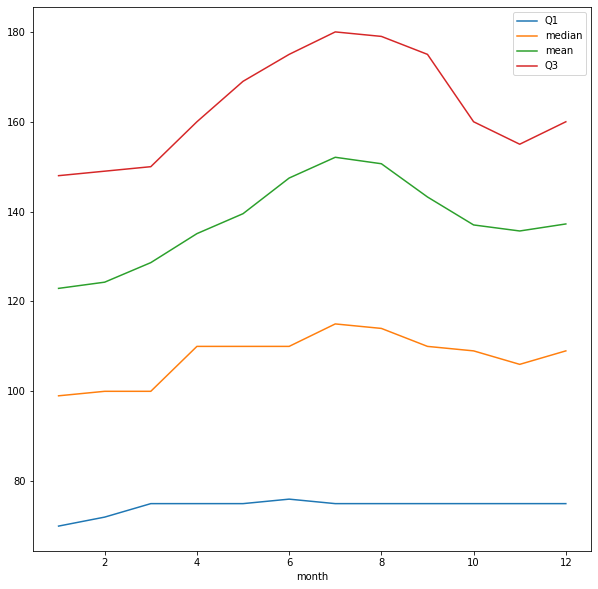

In [22]:
def plot_line_monthly_prices_quantile(monthly_price_quantiles):
    """
        show bar plot the quantile, mean prices by month
    """
    monthly_price_quantiles.plot.line(figsize=(10, 10))
    
plot_line_monthly_prices_quantile(monthly_price_quantiles)

1. Average prices are highest in summer and increase slightly in December. Perhaps summer holidays, year-end events, and Christmas were influential.
1. Prices fluctuate mainly at high price points, and cheap rooms do not change even when the season changes.

## Which features are most related to homestay cost?
By using `pandas.DataFrame.corr` can easily do correlation analysis. Let’s show the heatmap of correlation matrix by seaborn.

In [23]:
def get_listings_with_mean_price(listings, listings_price): 
    """
        add mean price column to listings
    """
    listings_numeric = pd.concat([listings.id, get_useful_numeric_subset(listings)], axis=1)
    listings_numeric = listings_numeric.fillna(0)
    listings_numeric = listings_numeric.merge(listings_price, left_on='id', right_on='listing_id')
    
    return listings_numeric

listings_with_mean_price = get_listings_with_mean_price(listings, listings_price)
listings_with_mean_price

,id,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,price
0,241032,3.0,3.0,4,1.0,1.0,1.0,0.0,2,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07,85.000000
1,953595,6.0,6.0,4,1.0,1.0,1.0,0.0,1,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.48,170.931271
2,3308979,2.0,2.0,11,4.5,5.0,7.0,0.0,10,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1.15,1301.818182
3,7421966,1.0,1.0,3,1.0,0.0,2.0,0.0,1,1,1125,0,0,0,143,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,100.000000
4,278830,2.0,2.0,6,2.0,3.0,3.0,0.0,6,1,1125,30,60,90,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,0.89,462.739726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3718,8101950,354.0,354.0,6,2.0,3.0,3.0,0.0,1,3,1125,18,32,32,32,1,80.0,8.0,10.0,4.0,8.0,10.0,8.0,0.30,359.000000
3719,8902327,1.0,1.0,4,1.0,1.0,2.0,0.0,3,2,29,6,26,44,273,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,2.00,100.201465
3720,10267360,1.0,1.0,2,1.0,1.0,1.0,0.0,2,1,7,29,59,88,88,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,87.886364
3721,9604740,1.0,1.0,2,1.0,0.0,1.0,0.0,1,3,1125,30,60,90,179,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,99.000000


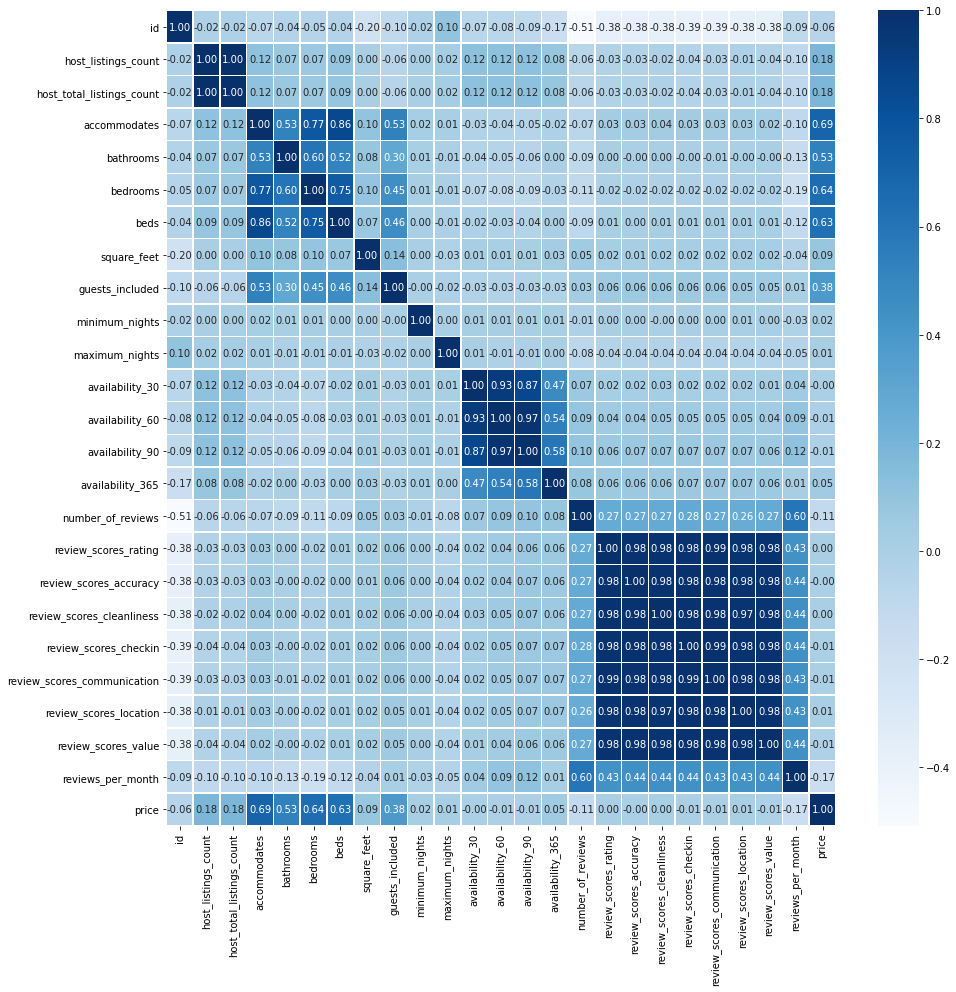

In [24]:
def plot_normalized_numeric_heatmap(listings_with_mean_price):
    """
        normalize all columns of dataframe and plot correlation heatmap
    """
    normalized_df=(listings_with_mean_price-listings_with_mean_price.mean())/listings_with_mean_price.std()
    
    plt.figure(figsize=(15,15))
    sns.heatmap(data = normalized_df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

plot_normalized_numeric_heatmap(listings_with_mean_price)

### Correlations related to reviews
1. Each score of review features has strong correlation.
1. Number of reviews and price has a little negative correlation. Expensive homestay are expected to no attract many people and have fewer reviews.

### Correlations related to bathrooms, accommodates, bedrooms, beds
1. The number of bedrooms, the number of bathrooms, and the number of beds have a high correlation with each other and a high correlation with price. It’s natural to think that the more rooms, beds, and toilets you have, the more expensive it becomes. However, the number of people was the most influential among them (0.69).
1. Whether or not a homestay can be rented for a long time has no significant correlation with other features other than each other. The minimum and maximum stay dates are not significantly correlated with other features.

## What is different between superhost and regular host?
Let's compare the mean of numeric columns between superhost and regular host

In [25]:
def get_numeric_mean_by_hosts(superhosts_numeric, regularhosts_numeric):
    """
        get mean values of numeric column by host
        mean() function skip NaN values
        NaN is difficult to measure, so exclude it
    """
    
    # drop useless columns and get only numeric data
    mean_compare = pd.concat(
        [
            superhosts_numeric.mean(), 
            regularhosts_numeric.mean()
        ], 
        axis=1
    )
    mean_compare.columns = ["superhost", "regular"]
    
    # add dataframe length on the first row
    return pd.concat([
        pd.DataFrame(
            [[len(superhosts), len(regularhosts)]], 
            index = ['count'],
            columns=mean_compare.columns
        ), 
        mean_compare
    ])

numeric_mean_by_hosts = get_numeric_mean_by_hosts(superhosts_numeric, regularhosts_numeric)
numeric_mean_by_hosts

,superhost,regular
count,778.000000,3038.000000
host_listings_count,4.880463,7.740948
host_total_listings_count,4.880463,7.740948
accommodates,3.338046,3.353193
bathrooms,1.255141,1.260754
bedrooms,1.257069,1.321240
beds,1.682519,1.749424
square_feet,878.586207,844.397059
guests_included,1.829049,1.632982
minimum_nights,2.182519,2.417709


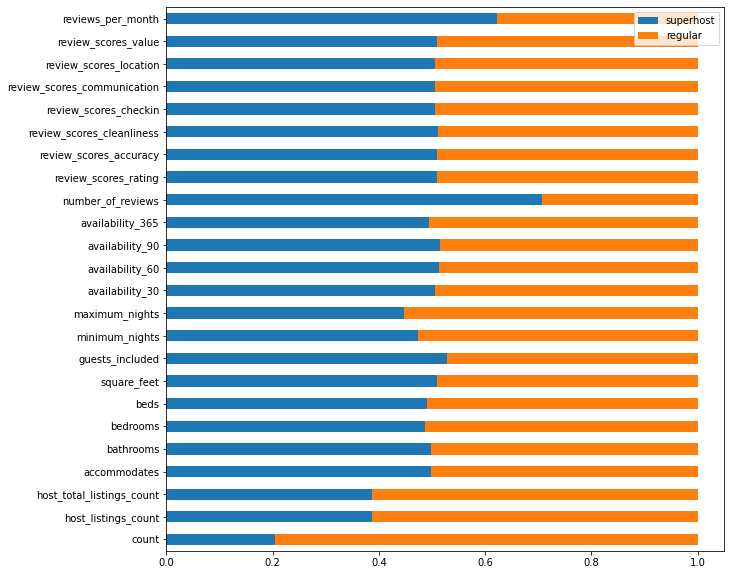

In [26]:
def plot_numeric_mean_by_host(numeric_mean_by_hosts):
    """
        The average value of superhost and normal host is converted to a relative ratio 
        for easy viewing and displayed as a bar histogram.
    """
    proportions = numeric_mean_by_hosts.div(numeric_mean_by_hosts.sum(axis=1), axis=0)
    proportions.plot(kind='barh', stacked='true', figsize=(10, 10))
    
plot_numeric_mean_by_host(numeric_mean_by_hosts)

1. Superhosts almost slightly outperformed all score of reviews. However, there are far more reviews written. It could be because more customers are staying at accommodation on the superhost, or it could be because the superhost encourages customers to actively write reviews.
1. Another difference is that on average the superhost has fewer rooms than the rest of the hosts.
1. Even though the average number of beds, toilets, and number of people in a room operated by superhosts are slightly smaller There is a shorter minimum/maximum period for customers to stay, and more guests can be included. But the difference is not big.

## Date the host started hosting
Assuming that the higher the number of reviews, the more customers it attracts, the more likely a superhost will have other factors that can attract more customers. For example, they may have been running a homestay for a long time, or their location may be better.

In [27]:
def get_host_since_year(df):
    return df.host_since.str.split("-", expand=True)[0].astype(int)

In [28]:
def plot_hist_host_since(df, title):
    df.plot.hist(bins=len(df.value_counts()), title=title)

In [29]:
superhosts, regularhosts = split_host()

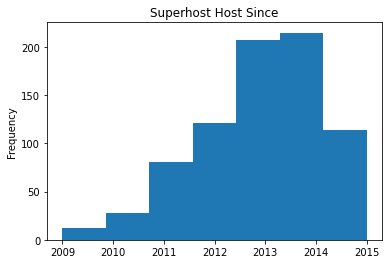

In [30]:
plot_hist_host_since(get_host_since_year(superhosts), "Superhost Host Since")

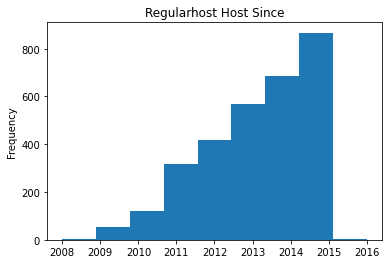

In [31]:
plot_hist_host_since(get_host_since_year(regularhosts), "Regularhost Host Since")

AirBnB superhost do not requires long hosting period. Host can become a superhost even if hosting period is less than 12 months. Hosting for a long time doesn’t mean host will become a superhost.

## Location differences between superhosts and regular hosts
It was not possible to identify nearby facilities with the given data. So I marked the host’s location on the map. Red is superhost, blue is regular host.

In [32]:
# FILL YOUR_GMAP_API_KEY_HERE
GMAP_API_KEY = "YOUR_GMAP_API_KEY_HERE"

In [33]:
def gmplot_host_location(locations, color, name, size=40):
    gmap = gmplot.GoogleMapPlotter(47.608013, -122.335167, 12, apikey=GMAP_API_KEY)
    gmap.scatter(locations.latitude, locations.longitude, color=color, size=size, marker=False)
    gmap.draw(f"map-{name}.html")

gmplot_host_location(superhosts_location, "#FF0000", "superhost")
gmplot_host_location(regularhosts_location, "#0000FF", "regularhost")
# and open 'map-superhost.html', 'map-regularhost.html' file!

<b>It can be seen that there is not a big difference in location.</b>

## map-superhost.html
<img src="./img/superhosts.png" width=600px/>

## map-regularhost.html
<img src="./img/regularhosts.png" width=600px/>

# Conclusion
1. Accommodation prices increase in summer and December and are lowest at the beginning of the year. However, the lower the price, the less the volatility.
1. The size of the accommodation has a big impact on the price. Price and number of reviews have a weak negative correlation.
1. The biggest distinction between the superhost and the rest is the number of reviews. The rating is slightly higher than the rest, but it is about the same level.